In [ ]:
 #Thesis Statement: who should tinder market their next campaign towards and what should the campaign be?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tinder=pd.read_csv('Tinder_Data_v3_Clean_Edition.csv')
tinder.info()
new_headers = [
    "id",
    "app_opens",
    "days_active",
    "conversations",
    "longest_conv",
    "longest_conv_days",
    "avg_conv",
    "avg_conv_days",
    "median_conv",
    "median_conv_days",
    "one_msg_convos",
    "one_msg_pct",
    "ghostings",
    "matches",
    "msgs_sent",
    "msgs_received",
    "likes",
    "passes",
    "birth_date",
    "age_min",
    "age_max",
    "city",
    "country",
    "create_date",
    "education",
    "gender",
    "interested_in",
    "instagram",
    "spotify",
    "job",
    "age"
]

tinder.columns=new_headers
tinder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   _id                               1209 non-null   object 
 1   sum_app_opens                     1209 non-null   int64  
 2   no_of_days                        1209 non-null   int64  
 3   nrOfConversations                 1209 non-null   int64  
 4   longestConversation               1209 non-null   int64  
 5   longestConversationInDays         1209 non-null   int64  
 6   averageConversationLength         1209 non-null   float64
 7   averageConversationLengthInDays   1209 non-null   float64
 8   medianConversationLength          1209 non-null   int64  
 9   medianConversationLengthInDays    1209 non-null   float64
 10  nrOfOneMessageConversations       1209 non-null   int64  
 11  percentOfOneMessageConversations  1209 non-null   float64
 12  nrOfGh

,id,app_opens,days_active,conversations,longest_conv,longest_conv_days,avg_conv,avg_conv_days,median_conv,median_conv_days,...,city,country,create_date,education,gender,interested_in,instagram,spotify,job,age
0,00b74e27ad1cbb2ded8e907fcc49eaaf,6839,477,739,133,684,8.56,10.24,3,0.081134,...,Trondheim,Norway,2016-01-01,Has high school and/or college education,M,F,False,False,unknown,40
1,024610702baf540af5637873cd1534e9,26280,1197,464,36,622,4.50,3.97,2,0.000069,...,Richmond,USA,2016-07-12,Has high school and/or college education,M,F,False,False,unknown,19
2,0a5e3dd8489fe67485ddb7d6adb26ebd,3196,249,303,33,295,4.25,3.47,2,0.033715,...,unknown,unknown,2019-07-01,Has no high school or college education,M,F,False,False,unknown,21
3,048dd37565ad9cbc24c163ffedffbf58,2077,158,47,28,130,7.89,5.88,6,0.643727,...,Edmonton,Canada,2019-09-25,Has no high school or college education,M,F,False,False,unknown,21
4,0eb998fdde77f9c123c07eace18a5cc1,11946,715,809,444,198,6.82,1.92,3,0.091771,...,unknown,unknown,2017-11-17,Has no high school or college education,M,F,True,False,Research Assistant,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,f9c5d69262018174f70a3f80c00840db,0,0,8,42,7,12.88,1.28,8,0.312222,...,Utrecht,Netherlands,2021-08-06,Has no high school or college education,M,F,False,True,Software Developer,27
1205,d22a435c59f33741a8309c1b92c93977,5751,256,254,15,89,2.44,1.51,1,0.000000,...,Vienna,Austria,2020-07-30,Has no high school or college education,M,F,False,False,unknown,23
1206,179554148e4beb1e2aa1762f9a43a916,0,0,35,33,6,3.40,0.52,2,0.000058,...,Vancouver,Canada,2021-08-19,Has no high school or college education,M,F,False,False,unknown,19
1207,ae07095ee64c0423353ee5991fad5de1,7978,348,443,195,34,8.56,0.94,2,0.000081,...,London,United Kingdom,2020-04-26,Has no high school or college education,M,M and F,False,False,unknown,19


In [ ]:
#clean data
tinder = tinder.drop_duplicates(subset=['id'])
tinder_missing = tinder[tinder.isnull().any(axis=1)]

In [ ]:
#add new column for orientation
def get_orientation(row):
    gender = row['gender'].strip().lower()
    interested = row['interested_in'].strip().lower()

    # Straight
    if gender == 'm' and interested == 'f':
        return 'straight'
    if gender == 'f' and interested == 'm':
        return 'straight'

    # Gay / Lesbian
    if gender == 'm' and interested == 'm':
        return 'gay'
    if gender == 'f' and interested == 'f':
        return 'lesbian'

    # Bisexual (covers "M and F" or "F and M")
    if 'm' in interested and 'f' in interested:
        return 'bi'

    return None

tinder['orientation'] = tinder.apply(get_orientation, axis=1)


In [ ]:
#add column for total swipes
tinder['total_swipes'] = tinder['likes'] + tinder['passes']
tinder

,id,app_opens,days_active,conversations,longest_conv,longest_conv_days,avg_conv,avg_conv_days,median_conv,median_conv_days,...,create_date,education,gender,interested_in,instagram,spotify,job,age,orientation,total_swipes
0,00b74e27ad1cbb2ded8e907fcc49eaaf,6839,477,739,133,684,8.56,10.24,3,0.081134,...,2016-01-01,Has high school and/or college education,M,F,False,False,unknown,40,straight,47570
1,024610702baf540af5637873cd1534e9,26280,1197,464,36,622,4.50,3.97,2,0.000069,...,2016-07-12,Has high school and/or college education,M,F,False,False,unknown,19,straight,94627
2,0a5e3dd8489fe67485ddb7d6adb26ebd,3196,249,303,33,295,4.25,3.47,2,0.033715,...,2019-07-01,Has no high school or college education,M,F,False,False,unknown,21,straight,12179
3,048dd37565ad9cbc24c163ffedffbf58,2077,158,47,28,130,7.89,5.88,6,0.643727,...,2019-09-25,Has no high school or college education,M,F,False,False,unknown,21,straight,14623
4,0eb998fdde77f9c123c07eace18a5cc1,11946,715,809,444,198,6.82,1.92,3,0.091771,...,2017-11-17,Has no high school or college education,M,F,True,False,Research Assistant,21,straight,156842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,f9c5d69262018174f70a3f80c00840db,0,0,8,42,7,12.88,1.28,8,0.312222,...,2021-08-06,Has no high school or college education,M,F,False,True,Software Developer,27,straight,0
1205,d22a435c59f33741a8309c1b92c93977,5751,256,254,15,89,2.44,1.51,1,0.000000,...,2020-07-30,Has no high school or college education,M,F,False,False,unknown,23,straight,31986
1206,179554148e4beb1e2aa1762f9a43a916,0,0,35,33,6,3.40,0.52,2,0.000058,...,2021-08-19,Has no high school or college education,M,F,False,False,unknown,19,straight,0
1207,ae07095ee64c0423353ee5991fad5de1,7978,348,443,195,34,8.56,0.94,2,0.000081,...,2020-04-26,Has no high school or college education,M,M and F,False,False,unknown,19,bi,74778


In [ ]:
#add column for ratio of messages received ratio.

tinder['msgs_received_ratio'] = tinder['msgs_received'] / (tinder['msgs_received'] + tinder['msgs_sent'])

# replace NaN caused by division by zero
tinder['msgs_received_ratio'] = tinder['msgs_received_ratio'].fillna(0)


In [ ]:
#add new column for median conversation length in hours
tinder["median_conv_hours"] = tinder["median_conv_days"] * 24
tinder

,id,app_opens,days_active,conversations,longest_conv,longest_conv_days,avg_conv,avg_conv_days,median_conv,median_conv_days,...,gender,interested_in,instagram,spotify,job,age,orientation,total_swipes,msgs_received_ratio,median_conv_hours
0,00b74e27ad1cbb2ded8e907fcc49eaaf,6839,477,739,133,684,8.56,10.24,3,0.081134,...,M,F,False,False,unknown,40,straight,47570,0.492524,1.947222
1,024610702baf540af5637873cd1534e9,26280,1197,464,36,622,4.50,3.97,2,0.000069,...,M,F,False,False,unknown,19,straight,94627,0.419516,0.001667
2,0a5e3dd8489fe67485ddb7d6adb26ebd,3196,249,303,33,295,4.25,3.47,2,0.033715,...,M,F,False,False,unknown,21,straight,12179,0.471551,0.809167
3,048dd37565ad9cbc24c163ffedffbf58,2077,158,47,28,130,7.89,5.88,6,0.643727,...,M,F,False,False,unknown,21,straight,14623,0.376471,15.449444
4,0eb998fdde77f9c123c07eace18a5cc1,11946,715,809,444,198,6.82,1.92,3,0.091771,...,M,F,True,False,Research Assistant,21,straight,156842,0.522670,2.202500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,f9c5d69262018174f70a3f80c00840db,0,0,8,42,7,12.88,1.28,8,0.312222,...,M,F,False,True,Software Developer,27,straight,0,0.458333,7.493333
1205,d22a435c59f33741a8309c1b92c93977,5751,256,254,15,89,2.44,1.51,1,0.000000,...,M,F,False,False,unknown,23,straight,31986,0.633795,0.000000
1206,179554148e4beb1e2aa1762f9a43a916,0,0,35,33,6,3.40,0.52,2,0.000058,...,M,F,False,False,unknown,19,straight,0,0.410891,0.001389
1207,ae07095ee64c0423353ee5991fad5de1,7978,348,443,195,34,8.56,0.94,2,0.000081,...,M,M and F,False,False,unknown,19,bi,74778,0.497335,0.001944


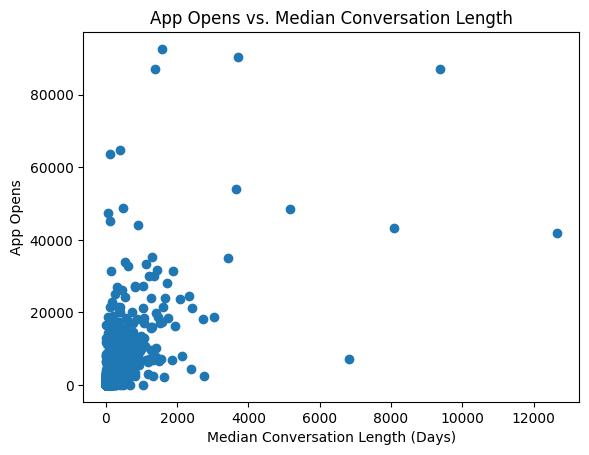

In [ ]:
#what is correlated with a high number of app opens? are number of conversations, long conversations correlated?
#high engagement is defined as a combination of high number app opens, long conversations, high number of total swipes
plt.scatter(tinder['conversations'],tinder['app_opens'])

plt.xlabel('Median Conversation Length (Days)')
plt.ylabel('App Opens')
plt.title('App Opens vs. Median Conversation Length')

plt.show()



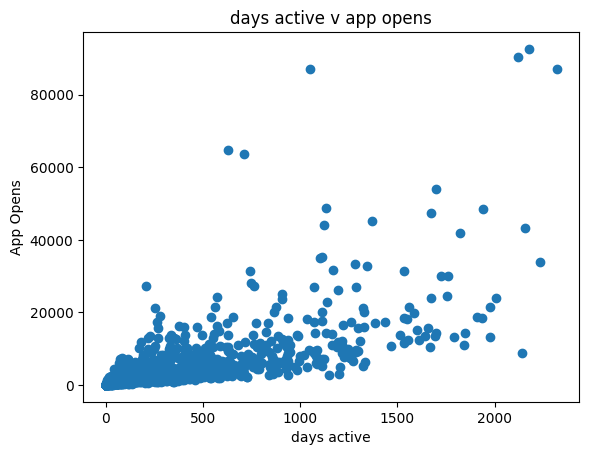

In [ ]:
plt.scatter(tinder['days_active'],tinder['app_opens'])

plt.xlabel('days active')
plt.ylabel('App Opens')
plt.title('days active v app opens')

plt.show()


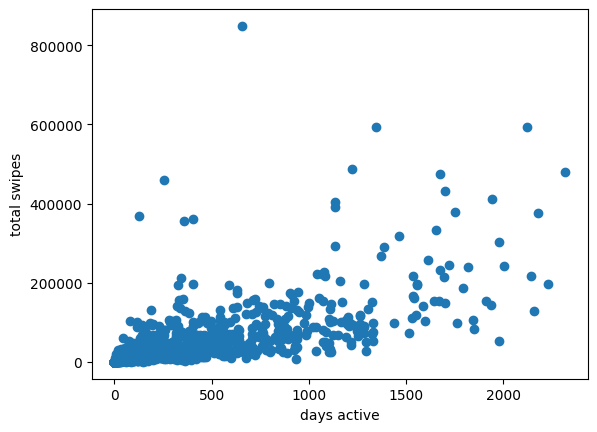

In [ ]:
plt.scatter(tinder['days_active'],tinder['total_swipes'])

plt.xlabel('days active')
plt.ylabel('total swipes')

plt.show()

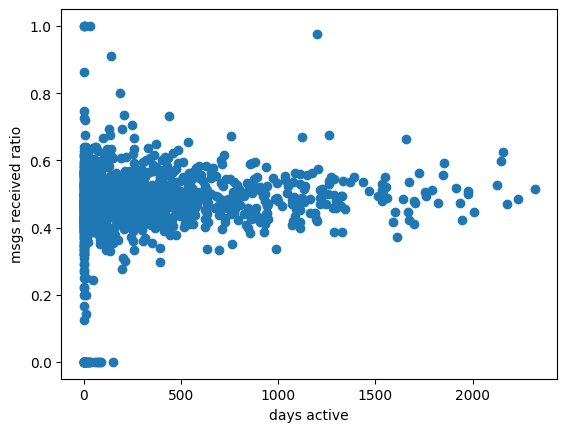

In [ ]:
#does the ratio of messges sent vs received correlated to long conversations, high app opens, and total swipes
plt.scatter(tinder['days_active'],tinder['msgs_received_ratio'])

plt.xlabel('days active')
plt.ylabel('msgs received ratio')

plt.show()

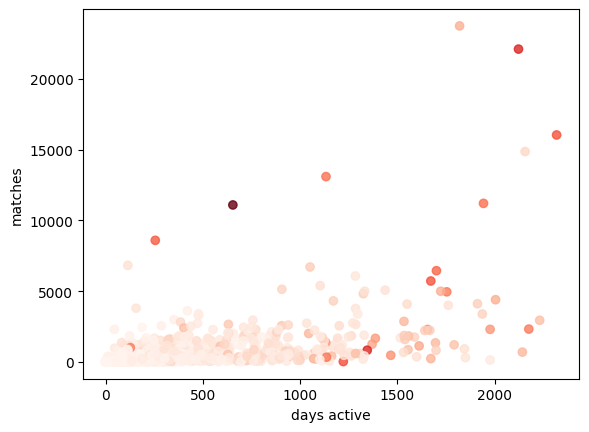

In [ ]:
plt.scatter(tinder['days_active'],tinder['matches'],c=tinder['total_swipes'], cmap='Reds',alpha=0.8)

plt.xlabel('days active')
plt.ylabel('matches')

plt.show()

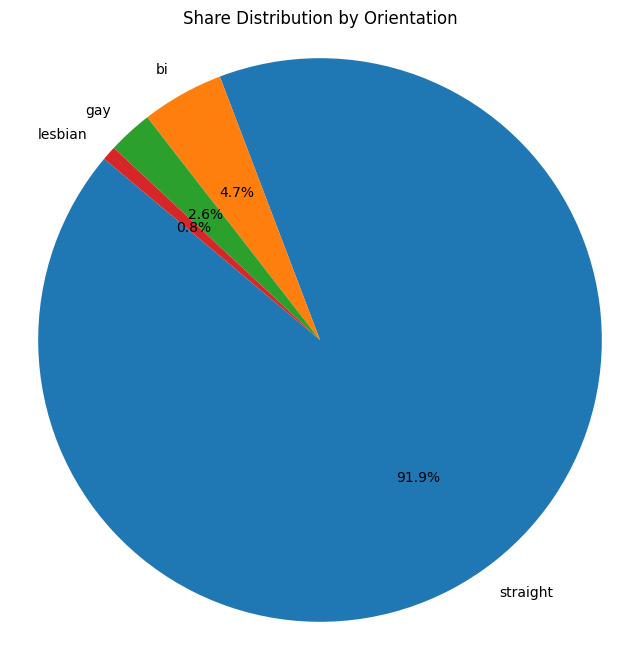

In [ ]:
# Count each orientation category
orientation_counts = tinder['orientation'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    orientation_counts,
    labels=orientation_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Share Distribution by Orientation')
plt.axis('equal')
plt.show()

/tmp/ipython-input-1210544733.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data = tinder.groupby("age_bin")["app_opens"].sum()


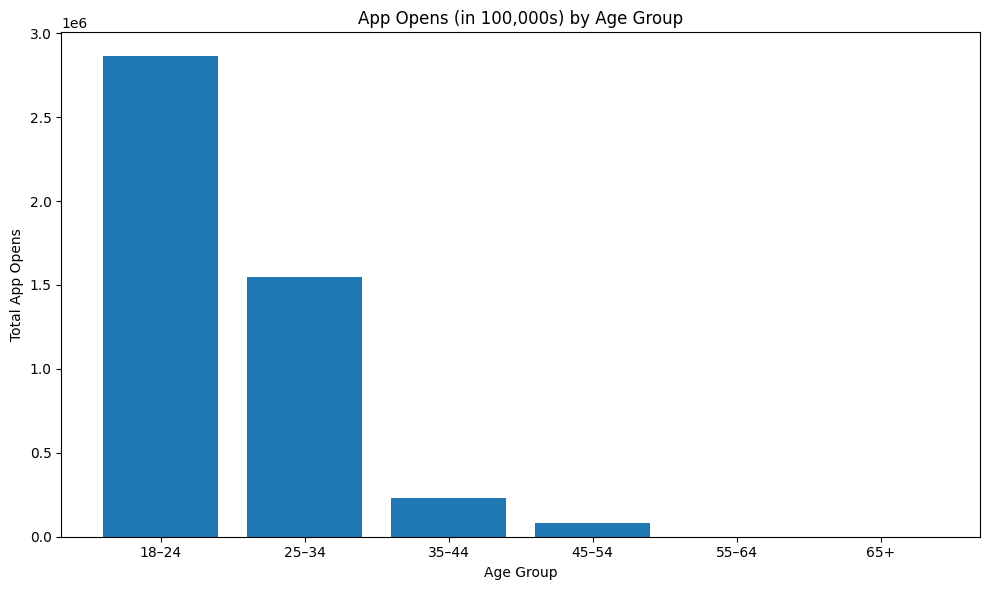

In [ ]:
#which age range has the most app opens, longest median coversations, and total swipes


bins = [18, 24, 34, 44, 54, 64, 100]
labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

tinder["age_bin"] = pd.cut(tinder["age"], bins=bins, labels=labels, right=True)


bin_data = tinder.groupby("age_bin")["app_opens"].sum()


plt.figure(figsize=(10, 6))
plt.bar(bin_data.index.astype(str), bin_data.values)

plt.xlabel("Age Group")
plt.ylabel("Total App Opens")
plt.title("App Opens (in 100,000s) by Age Group")

plt.tight_layout()
plt.show()



/tmp/ipython-input-2183340939.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data = tinder.groupby("age_bin")["total_swipes"].sum()


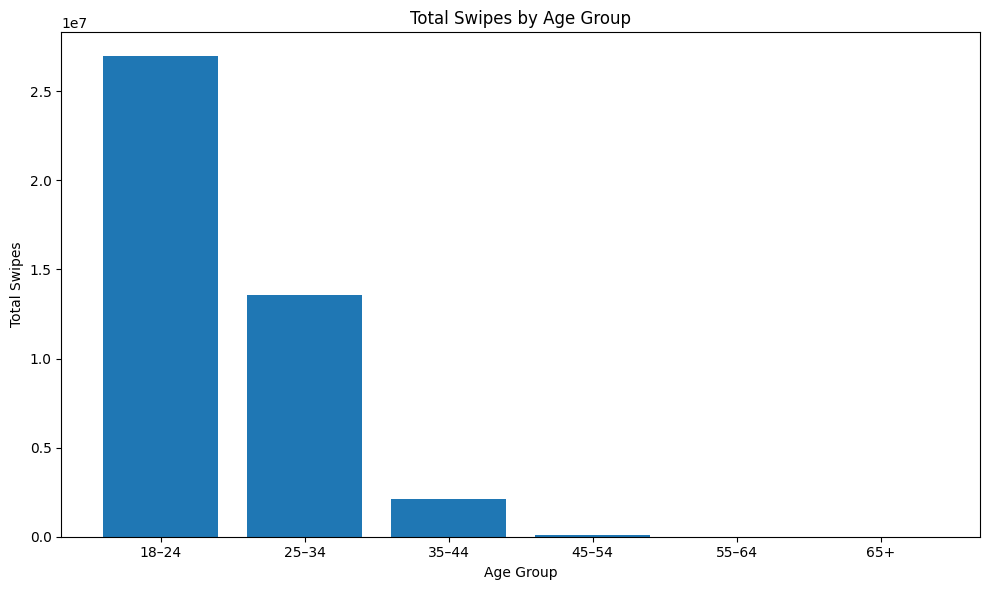

In [ ]:

bins = [18, 24, 34, 44, 54, 64, 100]
labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

tinder["age_bin"] = pd.cut(tinder["age"], bins=bins, labels=labels, right=True)


bin_data = tinder.groupby("age_bin")["total_swipes"].sum()

plt.figure(figsize=(10, 6))
plt.bar(bin_data.index.astype(str), bin_data.values)

plt.xlabel("Age Group")
plt.ylabel("Total Swipes")
plt.title("Total Swipes by Age Group")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1209046215.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data = tinder.groupby("age_bin")["median_conv_hours"].mean()


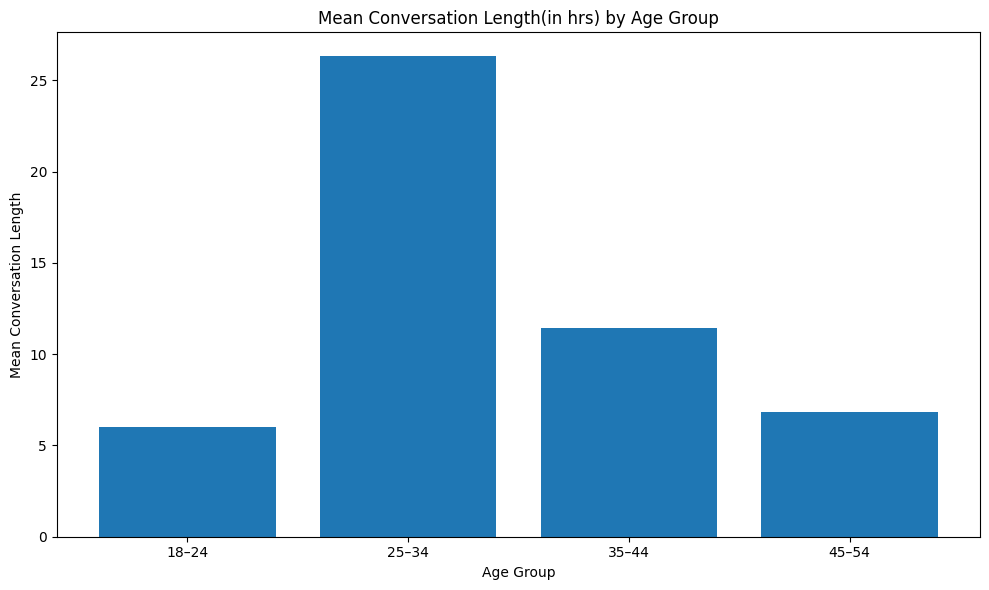

In [ ]:

bins = [18, 24, 34, 44, 54, 64, 100]
labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

tinder["age_bin"] = pd.cut(tinder["age"], bins=bins, labels=labels)


bin_data = tinder.groupby("age_bin")["median_conv_hours"].mean()

# Plot
plt.figure(figsize=(10,6))
plt.bar(bin_data.index.astype(str), bin_data.values)

plt.xlabel("Age Group")
plt.ylabel("Mean Conversation Length")
plt.title("Mean Conversation Length(in hrs) by Age Group")



plt.tight_layout()
plt.show()


In [ ]:
#which country, sexual orientation, sex, education level, has msot app opens, longest median conversations and total swipes

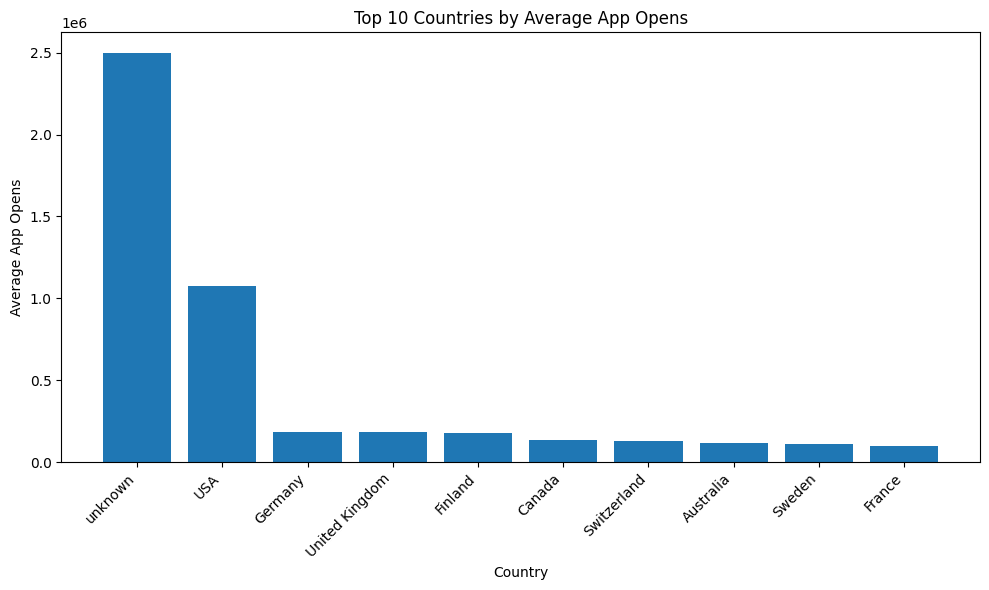

In [ ]:
#country
top10 = (
    tinder.groupby("country")["app_opens"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top10.index.astype(str), top10.values)
plt.xlabel("Country")
plt.ylabel("Average App Opens")
plt.title("Top 10 Countries by Average App Opens")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


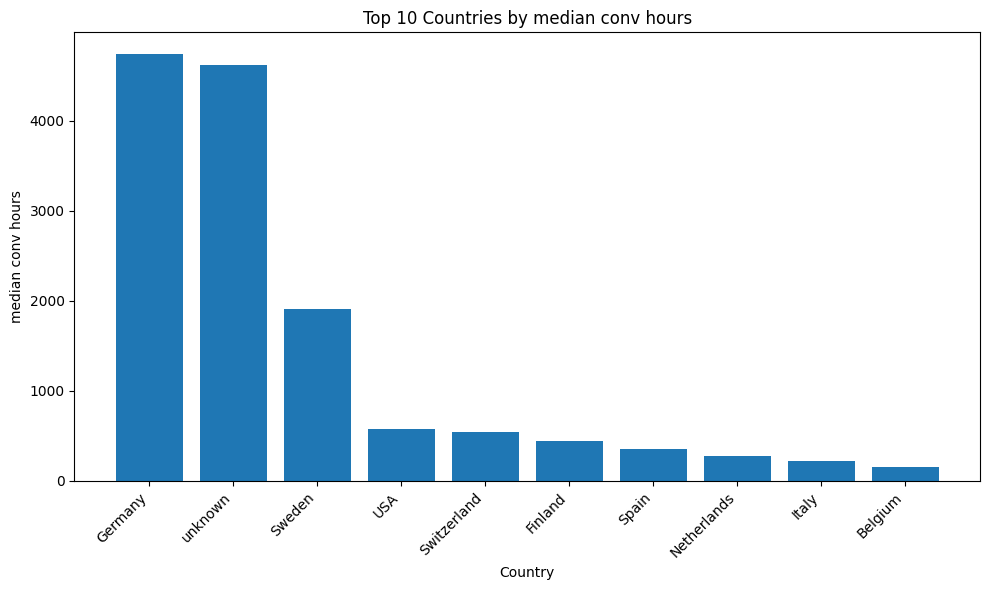

In [ ]:
top10 = (
    tinder.groupby("country")["median_conv_hours"].sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
plt.bar(top10.index.astype(str), top10.values)
plt.xlabel("Country")
plt.ylabel("median conv hours")
plt.title("Top 10 Countries by median conv hours")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


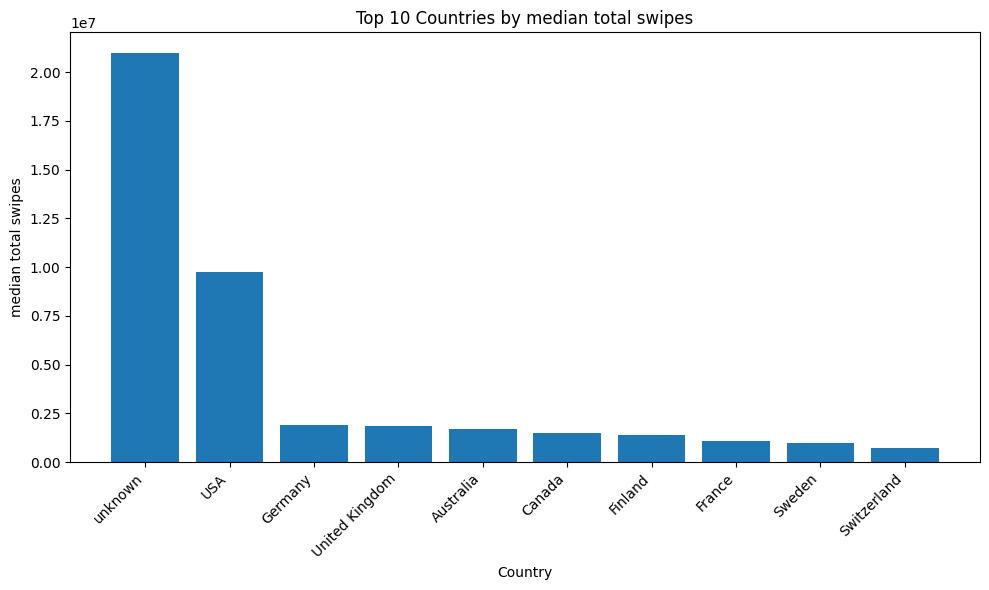

In [ ]:
top10 = (
    tinder.groupby("country")["total_swipes"].sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
plt.bar(top10.index.astype(str), top10.values)
plt.xlabel("Country")
plt.ylabel("median total swipes")
plt.title("Top 10 Countries by median total swipes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


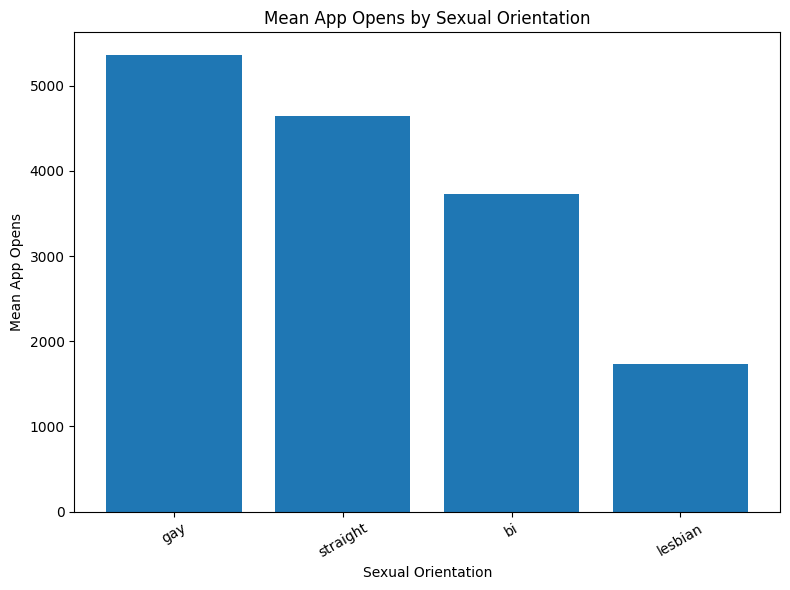

In [ ]:
#sexual orientation and engagement
data = (
    tinder.groupby("orientation")["app_opens"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8,6))
plt.bar(data.index.astype(str), data.values)
plt.xlabel("Sexual Orientation")
plt.ylabel("Mean App Opens")
plt.title("Mean App Opens by Sexual Orientation")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


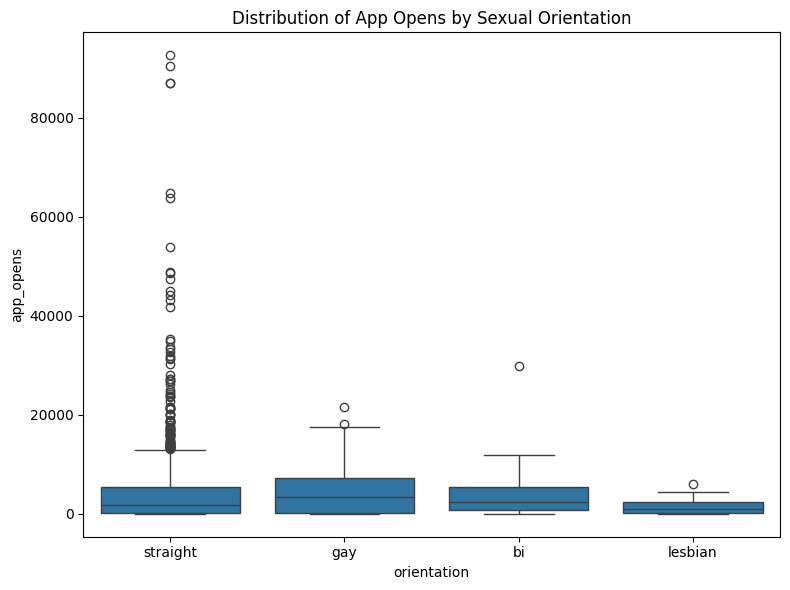

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=tinder, x="orientation", y="app_opens")
plt.title("Distribution of App Opens by Sexual Orientation")
plt.tight_layout()
plt.show()


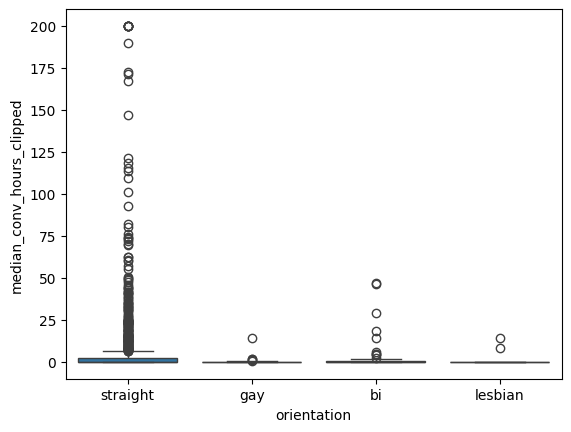

In [ ]:
tinder["median_conv_hours_clipped"] = tinder["median_conv_hours"].clip(upper=200)

sns.boxplot(
    data=tinder,
    x="orientation",
    y="median_conv_hours_clipped"
)
plt.show()



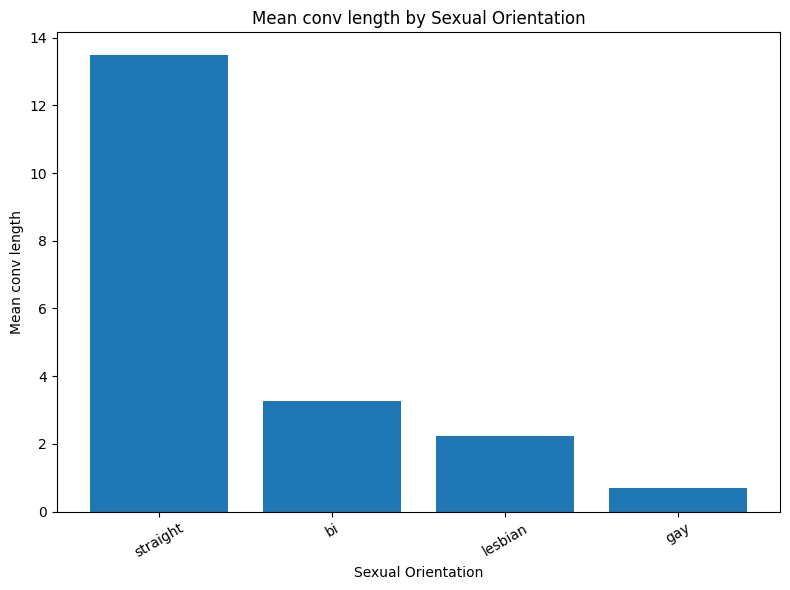

In [ ]:
data = (
    tinder.groupby("orientation")["median_conv_hours"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8,6))
plt.bar(data.index.astype(str), data.values)
plt.xlabel("Sexual Orientation")
plt.ylabel("Mean conv length")
plt.title("Mean conv length by Sexual Orientation")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

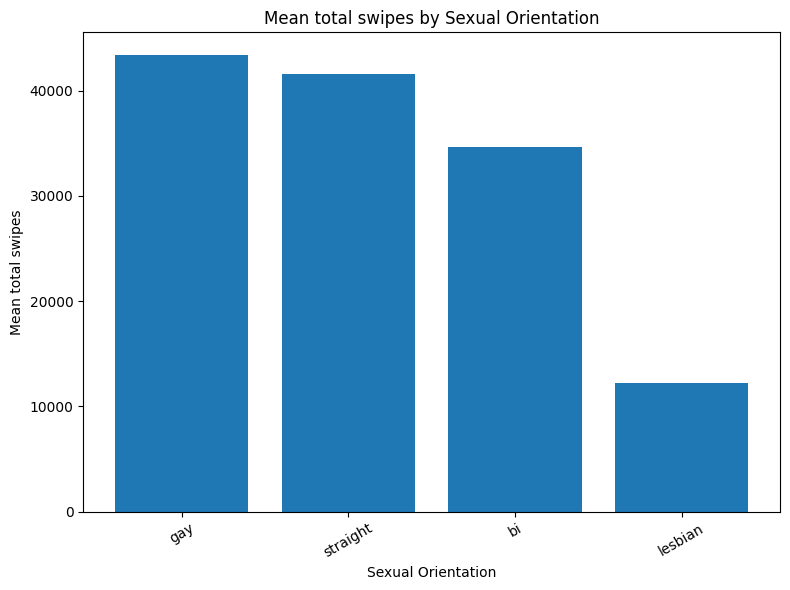

In [ ]:
data = (
    tinder.groupby("orientation")["total_swipes"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8,6))
plt.bar(data.index.astype(str), data.values)
plt.xlabel("Sexual Orientation")
plt.ylabel("Mean total swipes")
plt.title("Mean total swipes by Sexual Orientation")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/tmp/ipython-input-91409118.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tinder.pivot_table(


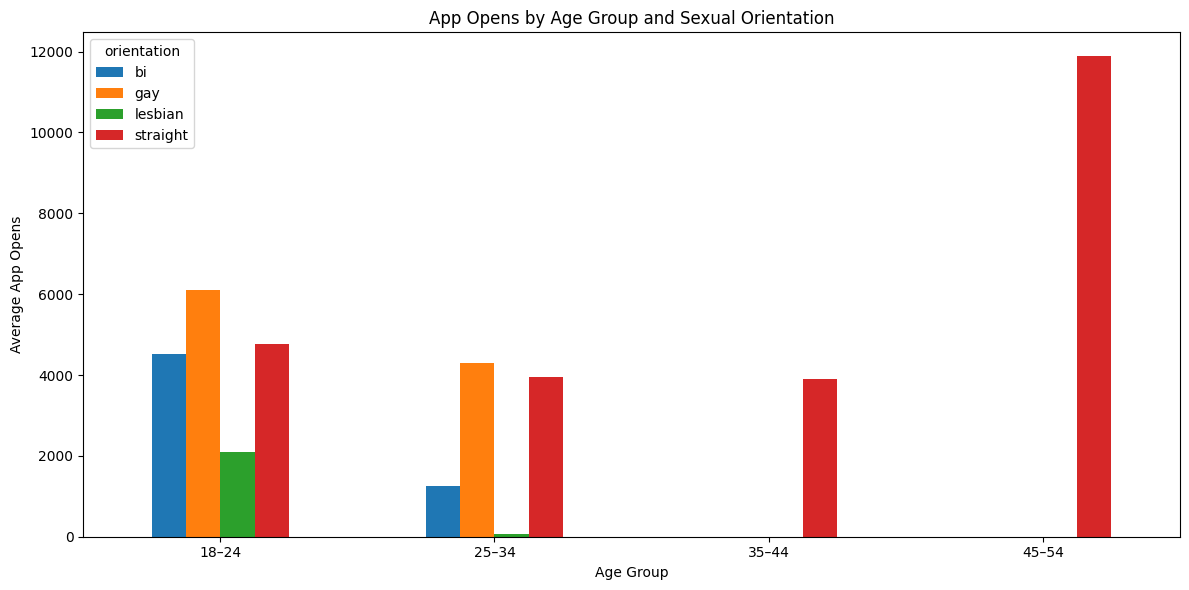

In [ ]:

bins = [18, 24, 34, 44, 54, 64, 100]
labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

tinder["age_group"] = pd.cut(tinder["age"], bins=bins, labels=labels)

pivot = tinder.pivot_table(
    index="age_group",
    columns="orientation",
    values="app_opens",
    aggfunc="mean"
)

pivot.plot(kind="bar", figsize=(12,6))
plt.xlabel("Age Group")
plt.ylabel("Average App Opens")
plt.title("App Opens by Age Group and Sexual Orientation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2227952404.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tinder.pivot_table(


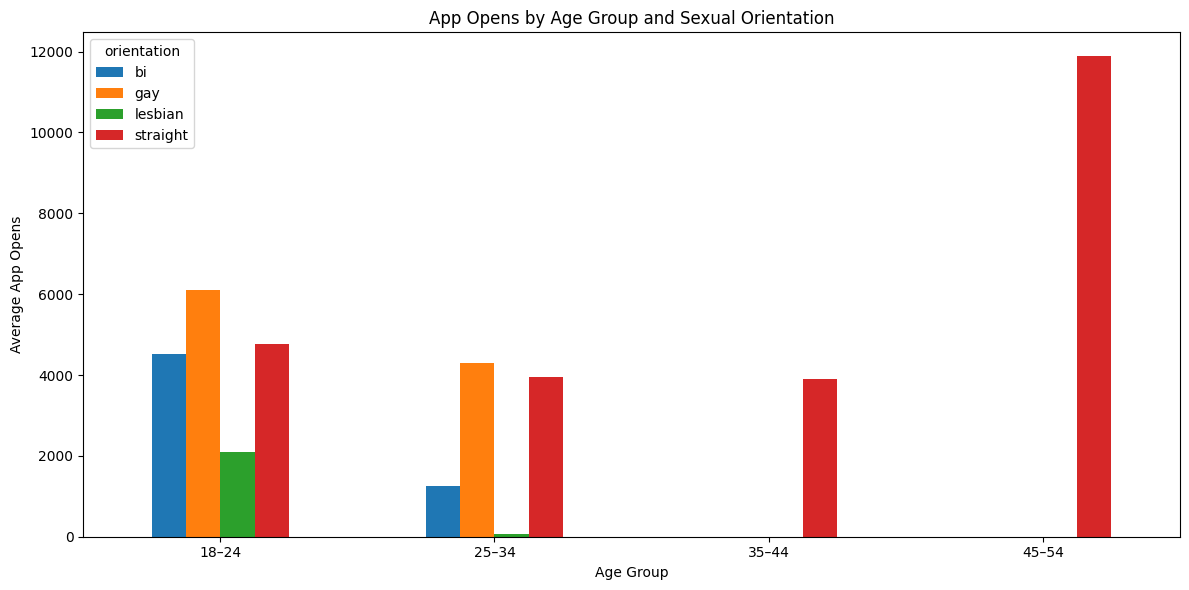

In [ ]:
bins = [18, 24, 34, 44, 54, 64, 100]
labels = ["18–24", "25–34", "35–44", "45–54", "55–64", "65+"]

tinder["age_group"] = pd.cut(tinder["age"], bins=bins, labels=labels)

pivot = tinder.pivot_table(
    index="age_group",
    columns="orientation",
    values="app_opens",
    aggfunc="mean"
)

pivot.plot(kind="bar", figsize=(12,6))
plt.xlabel("Age Group")
plt.ylabel("Average App Opens")
plt.title("App Opens by Age Group and Sexual Orientation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

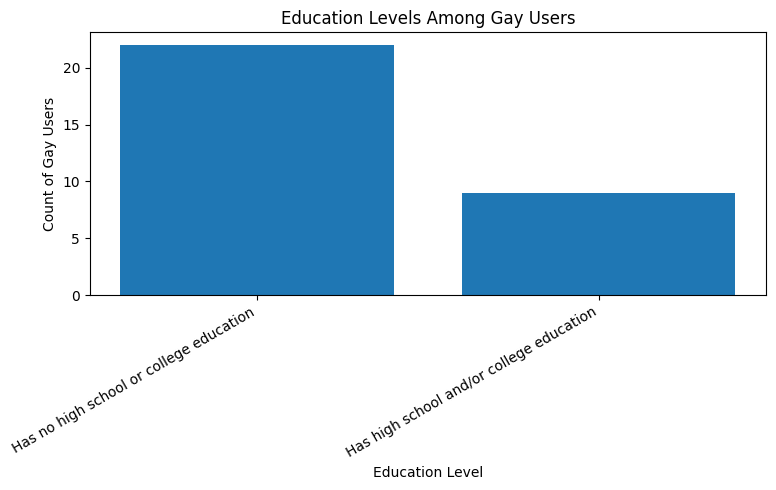

In [ ]:
gay = tinder[tinder["orientation"] == "gay"]
counts = gay["education"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(counts.index, counts.values)
plt.xlabel("Education Level")
plt.ylabel("Count of Gay Users")
plt.title("Education Levels Among Gay Users")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()



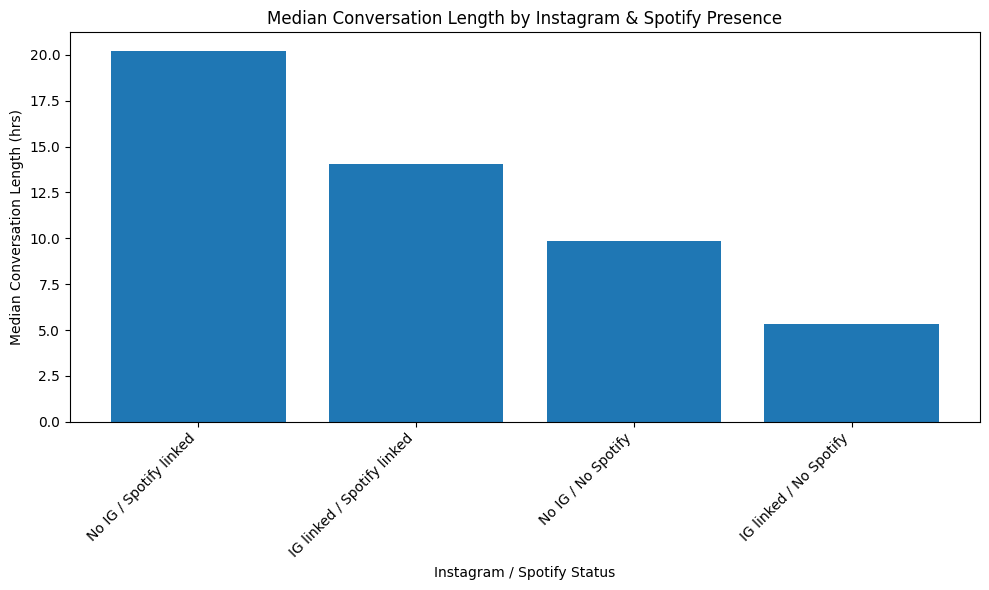

In [ ]:
#how does having spotify or instagram linkage relate to length of conversation

# ---- Clean flags for Instagram & Spotify ----
# (Assumes columns are booleans or True/False-like strings)
tinder["instagram"] =tinder["instagram"].astype(str)
tinder["spotify"] = tinder["spotify"].astype(str)

ig_map = {"True": "IG linked", "False": "No IG"}
sp_map = {"True": "Spotify linked", "False": "No Spotify"}

tinder["ig_flag"] = tinder["instagram"].map(ig_map).fillna("No IG")
tinder["sp_flag"] = tinder["spotify"].map(sp_map).fillna("No Spotify")

# Combine into one category for the x-axis
tinder["social_combo"] = tinder["ig_flag"] + " / " + tinder["sp_flag"]

# ---- Choose the metric for Y-axis ----
# Use median conv length in *days*:
metric = "median_conv_hours"
# If you already created hours: metric = "median_conv_hours"

# Aggregate: average median conversation length per combo
data = (
    tinder.groupby("social_combo")[metric]
      .mean()
      .sort_values(ascending=False)
)

# ---- Plot bar chart ----
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values)
plt.xlabel("Instagram / Spotify Status")
plt.ylabel("Median Conversation Length (hrs)")
plt.title("Median Conversation Length by Instagram & Spotify Presence")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# === SUMMARY TABLES REQUIRED FOR FINAL REPORT ===

print("\n============== 1. App Opens by Age Group (SUM) ==============")
print(tinder.groupby("age_group")["app_opens"].sum())

print("\n============== 2. Total Swipes by Age Group (SUM) ==============")
print(tinder.groupby("age_group")["total_swipes"].sum())

print("\n============== 3. Median Conversation Length (HOURS) by Age Group ==============")
print(tinder.groupby("age_group")["median_conv_hours"].median())

print("\n============== 4. Median App Opens by Sexual Orientation ==============")
print(tinder.groupby("orientation")["app_opens"].median())

print("\n============== 5. Median Conversation Length (HOURS) by Sexual Orientation ==============")
print(tinder.groupby("orientation")["median_conv_hours"].median())

print("\n============== 6. Median Conversation Length by Instagram & Spotify Linking ==============")
print(tinder.groupby(["instagram","spotify"])["median_conv_hours"].median())

print("\n============== 7. Count of Gay Users by Education Level ==============")
print(tinder[tinder["orientation"]=="gay"].groupby("education")["id"].count())



============== 1. App Opens by Age Group (SUM) ==============
age_group
18–24    2861895
25–34    1549136
35–44     229957
45–54      83173
55–64          0
65+            0
Name: app_opens, dtype: int64

============== 2. Total Swipes by Age Group (SUM) ==============
age_group
18–24    26961688
25–34    13558691
35–44     2133701
45–54      122449
55–64           0
65+             0
Name: total_swipes, dtype: int64

============== 3. Median Conversation Length (HOURS) by Age Group ==============
age_group
18–24    0.082222
25–34    0.297361
35–44    0.612500
45–54    0.726111
55–64         NaN
65+           NaN
Name: median_conv_hours, dtype: float64

============== 4. Median App Opens by Sexual Orientation ==============
orientation
bi          2436.0
gay         3304.0
lesbian     1028.5
straight    1857.0
Name: app_opens, dtype: float64

============== 5. Median Conversation Length (HOURS) by Sexual Orientation ==============
orientation
bi          0.007500
gay         0.000000


/tmp/ipython-input-2697729266.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tinder.groupby("age_group")["app_opens"].sum())
/tmp/ipython-input-2697729266.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tinder.groupby("age_group")["total_swipes"].sum())
/tmp/ipython-input-2697729266.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tinder.groupby("age_group")["median_conv_hours"].median())
